Importing Essential Libraries

In [343]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

Loading the Dataset

In [344]:
data = pd.read_csv("retail_store_sales.csv")

In [345]:
data.head()

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,True
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,True
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05,False
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07,NaN
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,False


In [346]:
data.describe()

,Price Per Unit,Quantity,Total Spent
count,11966.000000,11971.000000,11971.000000
mean,23.365912,5.536380,129.652577
std,10.743519,2.857883,94.750697
min,5.000000,1.000000,5.000000
25%,14.000000,3.000000,51.000000
50%,23.000000,6.000000,108.500000
75%,33.500000,8.000000,192.000000
max,41.000000,10.000000,410.000000


In [347]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12575 entries, 0 to 12574
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    12575 non-null  object 
 1   Customer ID       12575 non-null  object 
 2   Category          12575 non-null  object 
 3   Item              11362 non-null  object 
 4   Price Per Unit    11966 non-null  float64
 5   Quantity          11971 non-null  float64
 6   Total Spent       11971 non-null  float64
 7   Payment Method    12575 non-null  object 
 8   Location          12575 non-null  object 
 9   Transaction Date  12575 non-null  object 
 10  Discount Applied  8376 non-null   object 
dtypes: float64(3), object(8)
memory usage: 1.1+ MB


Counts missing values in each column

In [348]:
data.isnull().sum()

Transaction ID         0
Customer ID            0
Category               0
Item                1213
Price Per Unit       609
Quantity             604
Total Spent          604
Payment Method         0
Location               0
Transaction Date       0
Discount Applied    4199
dtype: int64

now to understand which value appears most frequently in the dataset we will plot the value count of "Item" column

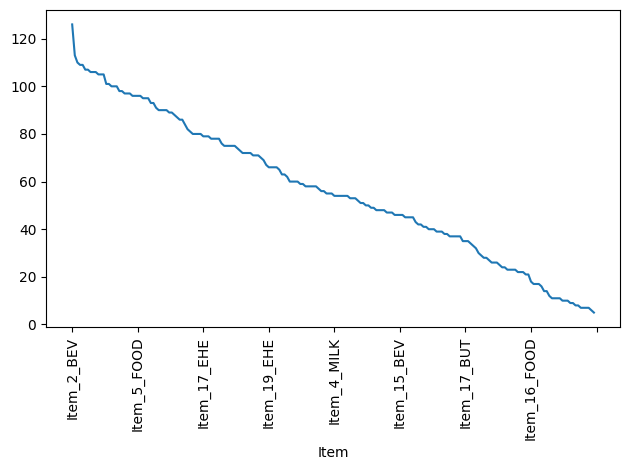

In [349]:
data["Item"].value_counts().plot(kind = "line")
plt.xticks(rotation=90)
plt.tight_layout()   

In [350]:
data["Item"].value_counts()

Item
Item_2_BEV      126
Item_25_FUR     113
Item_11_FUR     110
Item_16_MILK    109
Item_1_MILK     109
               ... 
Item_5_BEV        7
Item_13_BEV       7
Item_13_FUR       7
Item_21_PAT       6
Item_3_EHE        5
Name: count, Length: 200, dtype: int64

check for missing values in item column 

In [351]:
data["Item"].isnull().sum()

np.int64(1213)

now we will start by handeling the missing values in Item column by filling them with random values based on how frequently they appear 
we are doing so our model is not biased on one item 

In [352]:
valid_Item = data["Item"].dropna()

In [353]:
prob_item = valid_Item.value_counts(normalize = True )

In [354]:
prob_item

Item
Item_2_BEV      0.011090
Item_25_FUR     0.009945
Item_11_FUR     0.009681
Item_16_MILK    0.009593
Item_1_MILK     0.009593
                  ...   
Item_5_BEV      0.000616
Item_13_BEV     0.000616
Item_13_FUR     0.000616
Item_21_PAT     0.000528
Item_3_EHE      0.000440
Name: proportion, Length: 200, dtype: float64

In [355]:
nan_Item = data[data["Item"].isna()].index

In [356]:
nan_Item

Index([    5,     7,    11,    15,    17,    19,    21,    25,    32,    34,
       ...
       12477, 12491, 12495, 12511, 12519, 12527, 12552, 12556, 12562, 12564],
      dtype='int64', length=1213)

In [357]:
data.loc[nan_Item, 'Item'] = np.random.choice(
    prob_item.index,
    size = len(nan_Item),
    p = prob_item.values
)

now check if there are any missing values remaining 

In [358]:
data["Item"].isnull().sum()

np.int64(0)

After handling missing values, we re-plot the distribution of items to ensure the data remains balanced and realistic.

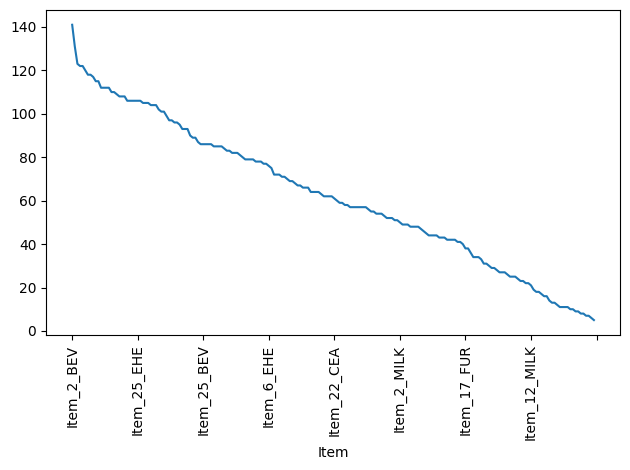

In [359]:
data["Item"].value_counts().plot(kind = "line")
plt.xticks(rotation=90)
plt.tight_layout()   

In [360]:
data.isnull().sum()

Transaction ID         0
Customer ID            0
Category               0
Item                   0
Price Per Unit       609
Quantity             604
Total Spent          604
Payment Method         0
Location               0
Transaction Date       0
Discount Applied    4199
dtype: int64

now to understand which value appears most frequently in the dataset we will plot the value count of "Price Per Unit" column

<Axes: xlabel='Price Per Unit'>

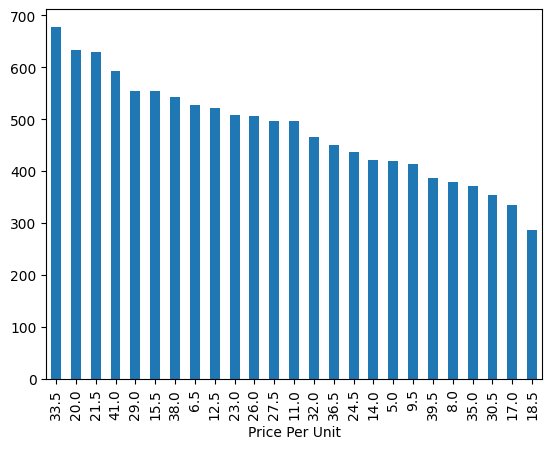

In [361]:
data["Price Per Unit"].value_counts().plot(kind = "bar")

check if there are any missing values in "Price Per Unit " column 

In [362]:
data["Price Per Unit"].isnull().sum()

np.int64(609)

now we will start by handeling the missing values in " Price Per Unit " column by filling them with random values based on how frequently they appear 
we are doing so our model is not biased on one price

In [363]:
valid_price = data["Price Per Unit"].dropna()

In [364]:
prob_price = valid_price.value_counts(normalize = True )

In [365]:
prob_item

Item
Item_2_BEV      0.011090
Item_25_FUR     0.009945
Item_11_FUR     0.009681
Item_16_MILK    0.009593
Item_1_MILK     0.009593
                  ...   
Item_5_BEV      0.000616
Item_13_BEV     0.000616
Item_13_FUR     0.000616
Item_21_PAT     0.000528
Item_3_EHE      0.000440
Name: proportion, Length: 200, dtype: float64

In [366]:
nan_price = data[data["Price Per Unit"].isna()].index

In [367]:
nan_price

Index([    5,    11,    17,    21,    32,   127,   159,   216,   247,   271,
       ...
       12337, 12339, 12365, 12386, 12387, 12435, 12457, 12477, 12491, 12511],
      dtype='int64', length=609)

In [368]:
data.loc[nan_price ,'Price Per Unit'] = np.random.choice(
    prob_price.index ,
    size = len(nan_price),
    p = prob_price.values
)

check if there are any missing values left 

In [369]:
data["Price Per Unit"].isnull().sum()

np.int64(0)

After handling missing values, we re-plot the distribution of " Price Per Unit " column  to ensure the data remains balanced and realistic.

<Axes: xlabel='Price Per Unit'>

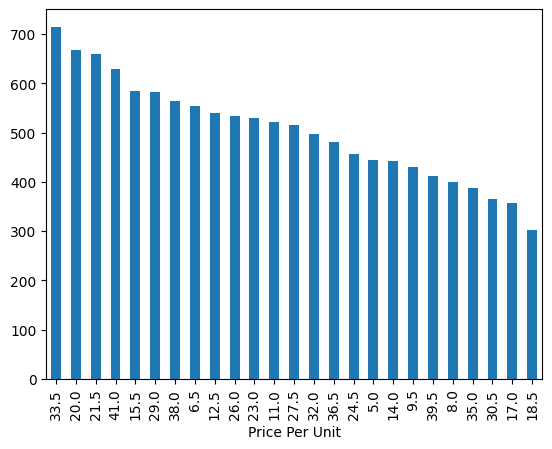

In [370]:
data["Price Per Unit"].value_counts().plot(kind = "bar")

In [371]:
data.isnull().sum()

Transaction ID         0
Customer ID            0
Category               0
Item                   0
Price Per Unit         0
Quantity             604
Total Spent          604
Payment Method         0
Location               0
Transaction Date       0
Discount Applied    4199
dtype: int64

now to understand which value appears most frequently in the dataset we will plot the value count of "Quantity" column

<Axes: xlabel='Quantity'>

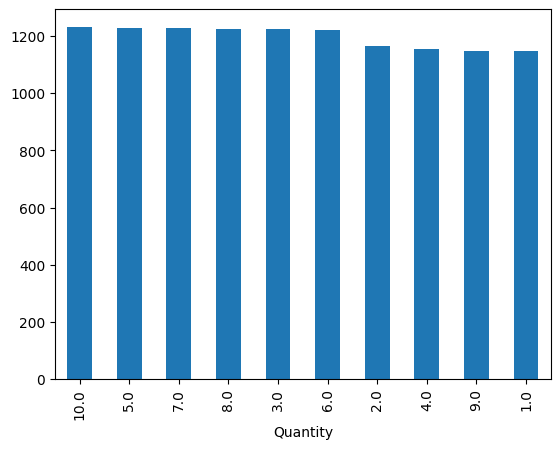

In [372]:
data["Quantity"].value_counts().plot(kind = "bar")

now we will start by handeling the missing values in " Quantity " column by filling them with random values based on how frequently they appear 
we are doing so our model is not biased on one Quantity

In [373]:
valid_quan = data["Quantity"].dropna() 

In [374]:
prob_quan = valid_quan.value_counts(normalize = True )

In [375]:
prob_quan

Quantity
10.0    0.102915
5.0     0.102581
7.0     0.102498
8.0     0.102414
3.0     0.102247
6.0     0.101913
2.0     0.097235
4.0     0.096483
9.0     0.095898
1.0     0.095815
Name: proportion, dtype: float64

In [376]:
nan_quan = data[data["Quantity"].isna()].index

In [377]:
nan_quan

Index([    7,    15,    19,    25,    34,    83,   112,   114,   118,   138,
       ...
       12462, 12465, 12466, 12495, 12519, 12527, 12552, 12556, 12562, 12564],
      dtype='int64', length=604)

In [378]:
data.loc[nan_quan ,'Quantity'] = np.random.choice(
    prob_quan.index ,
    size = len(nan_quan),
    p = prob_quan.values
)

check if there are any missing values left after imputation

In [379]:
data["Quantity"].isnull().sum()

np.int64(0)

After handling missing values, we re-plot the distribution of " Quantity " column  to ensure the data remains balanced and realistic.

<Axes: xlabel='Quantity'>

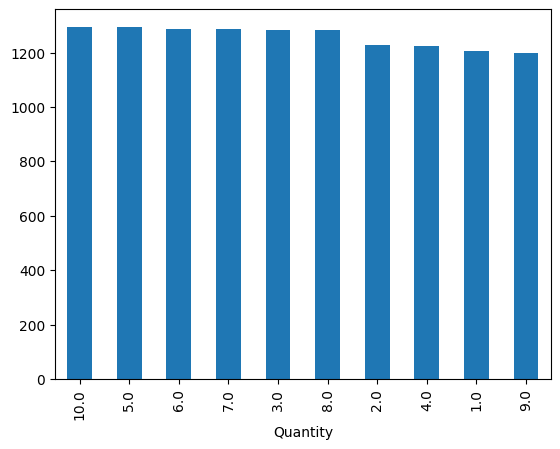

In [380]:
data["Quantity"].value_counts().plot(kind = "bar")

In [381]:
data.isnull().sum()

Transaction ID         0
Customer ID            0
Category               0
Item                   0
Price Per Unit         0
Quantity               0
Total Spent          604
Payment Method         0
Location               0
Transaction Date       0
Discount Applied    4199
dtype: int64

In [382]:
data["Total Spent"].value_counts()

Total Spent
40.0     140
80.0     124
25.0     122
140.0    118
20.0     108
        ... 
129.5     25
85.0      24
274.5     24
37.0      22
166.5     17
Name: count, Length: 227, dtype: int64

some values in " Total Spent " column are missing since the " Total Spent " is " Quantity " * " Price Per Unit " we will use calculation to fill the missing values 

In [383]:
data.loc[data['Total Spent'].isna(), 'Total Spent'] = (data['Quantity'] * data['Price Per Unit'])

In [384]:
data.isnull().sum()

Transaction ID         0
Customer ID            0
Category               0
Item                   0
Price Per Unit         0
Quantity               0
Total Spent            0
Payment Method         0
Location               0
Transaction Date       0
Discount Applied    4199
dtype: int64

now all the neccessary values are filled from all columns except for Discount Applied 
since there are  4199 missing values in that column we will predict them instead of using probablistic method 
because they make over 30-40 % of our dataset 

In [385]:
data.head()

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,True
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,True
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05,False
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07,NaN
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,False


In [386]:
data["Category"].value_counts()

Category
Electric household essentials         1591
Furniture                             1591
Food                                  1588
Milk Products                         1584
Butchers                              1568
Beverages                             1567
Computers and electric accessories    1558
Patisserie                            1528
Name: count, dtype: int64

convert the `Category` column from text labels to numeric values using `LabelEncoder`

In [387]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data["Category"] = le.fit_transform(data["Category"])

In [388]:
data["Category"].value_counts()

Category
3    1591
5    1591
4    1588
6    1584
1    1568
0    1567
2    1558
7    1528
Name: count, dtype: int64

In [389]:
data.head()

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,7,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,True
1,TXN_3731986,CUST_22,6,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,True
2,TXN_9303719,CUST_02,1,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05,False
3,TXN_9458126,CUST_06,0,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07,NaN
4,TXN_4575373,CUST_05,4,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,False


In [390]:
data["Payment Method"].value_counts()

Payment Method
Cash              4310
Digital Wallet    4144
Credit Card       4121
Name: count, dtype: int64

convert the `Payment Method` column from text labels to numeric values using `LabelEncoder`

In [391]:
data["Payment Method"] = le.fit_transform(data["Payment Method"])

In [392]:
data["Payment Method"].value_counts()

Payment Method
0    4310
2    4144
1    4121
Name: count, dtype: int64

In [393]:
data.head()

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,7,Item_10_PAT,18.5,10.0,185.0,2,Online,2024-04-08,True
1,TXN_3731986,CUST_22,6,Item_17_MILK,29.0,9.0,261.0,2,Online,2023-07-23,True
2,TXN_9303719,CUST_02,1,Item_12_BUT,21.5,2.0,43.0,1,Online,2022-10-05,False
3,TXN_9458126,CUST_06,0,Item_16_BEV,27.5,9.0,247.5,1,Online,2022-05-07,NaN
4,TXN_4575373,CUST_05,4,Item_6_FOOD,12.5,7.0,87.5,2,Online,2022-10-02,False


In [394]:
data["Location"].value_counts()

Location
Online      6354
In-store    6221
Name: count, dtype: int64

convert the `Location` column from text labels to numeric values using `LabelEncoder`

In [395]:
data["Location"] = le.fit_transform(data["Location"])

In [396]:
data["Location"].value_counts()

Location
1    6354
0    6221
Name: count, dtype: int64

In [397]:
data.head()

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,7,Item_10_PAT,18.5,10.0,185.0,2,1,2024-04-08,True
1,TXN_3731986,CUST_22,6,Item_17_MILK,29.0,9.0,261.0,2,1,2023-07-23,True
2,TXN_9303719,CUST_02,1,Item_12_BUT,21.5,2.0,43.0,1,1,2022-10-05,False
3,TXN_9458126,CUST_06,0,Item_16_BEV,27.5,9.0,247.5,1,1,2022-05-07,NaN
4,TXN_4575373,CUST_05,4,Item_6_FOOD,12.5,7.0,87.5,2,1,2022-10-02,False


replacing True with 1 and False with 0 

In [398]:
data["Discount Applied"] = data["Discount Applied"].replace({True : 1 , False : 0})

C:\Users\Admin\AppData\Local\Temp\ipykernel_22608\1037433429.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["Discount Applied"] = data["Discount Applied"].replace({True : 1 , False : 0})


now we will remove all the useless columns ar columns that are irrelevant

In [399]:
data = data.drop("Transaction ID", axis=1)
data = data.drop("Customer ID", axis=1)
data = data.drop("Item", axis=1)
data = data.drop("Transaction Date", axis=1)

now will will distribute the data into two parts 
data_know : consists of all the rows that does not have any null values in " Discount Applied " column
data_unknown : consists of all the rows that have null values in " Discount Applied " column

In [400]:
data_known = data[~data["Discount Applied"].isna()]

In [401]:
data_known

,Category,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Discount Applied
0,7,18.5,10.0,185.0,2,1,1.0
1,6,29.0,9.0,261.0,2,1,1.0
2,1,21.5,2.0,43.0,1,1,0.0
4,4,12.5,7.0,87.5,2,1,0.0
6,4,5.0,8.0,40.0,1,0,1.0
...,...,...,...,...,...,...,...
12566,6,5.0,4.0,20.0,0,1,0.0
12567,1,8.0,5.0,40.0,1,0,0.0
12569,7,5.0,9.0,45.0,2,0,0.0
12571,0,6.5,9.0,58.5,0,1,0.0


In [402]:
data_unknown = data[data["Discount Applied"].isna()]

In [403]:
data_unknown

,Category,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Discount Applied
3,0,27.5,9.0,247.5,1,1,NaN
5,7,5.0,10.0,200.0,1,1,NaN
14,6,27.5,2.0,55.0,2,1,NaN
15,0,24.5,5.0,122.5,1,0,NaN
17,6,36.5,10.0,275.0,2,1,NaN
...,...,...,...,...,...,...,...
12562,1,33.5,3.0,100.5,0,1,NaN
12568,4,9.5,8.0,76.0,2,0,NaN
12570,7,38.0,4.0,152.0,1,0,NaN
12572,1,14.0,10.0,140.0,0,1,NaN


We define the input features (`X`) and target variable (`y`) separately for both the known and unknown datasets:

In [404]:
X_known = data_known[["Category","Price Per Unit","Quantity","Total Spent","Payment Method","Location"]]
y_known = data_known["Discount Applied"]

In [405]:
X_unknown = data_unknown[["Category","Price Per Unit","Quantity","Total Spent","Payment Method","Location"]]
y_unknown = data_unknown["Discount Applied"]

splitting data into training and testing sets

In [406]:
from sklearn.model_selection import train_test_split

X_train_k , X_test_k , y_train_k , y_test_k = train_test_split(X_known , y_known ,test_size = 0.27 , random_state = 42 )

now we will start by checkingwhich model gives us the best accuracy on known data set so we can use that to predict the values in unknown_data 

In [407]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train_k,y_train_k)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [408]:
from sklearn.metrics import accuracy_score

tree_pred = tree.predict(X_test_k)
tree_accuracy = accuracy_score(y_test_k , tree_pred)

print(f"Accuracy of DecisionTreeClassifier is : {tree_accuracy * 100} %")

Accuracy of DecisionTreeClassifier is : 48.54111405835544 %


In [429]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_k,y_train_k)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [430]:
rf_pred = rf.predict(X_test_k)
rf_accuracy = accuracy_score(y_test_k , rf_pred)

print(f"Accuracy of RandomforestClassifier is : {rf_accuracy * 100} %")

Accuracy of RandomforestClassifier is : 50.884173297966406 %


In [411]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_train_k,y_train_k)

,n_neighbors,4
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [412]:
knn_pred = knn.predict(X_test_k)
knn_accuracy = accuracy_score(y_test_k , knn_pred)

print(f"Accuracy of KNeighborsClassifier is : {knn_accuracy * 100} %")

Accuracy of KNeighborsClassifier is : 50.70733863837312 %


In [413]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train_k,y_train_k)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [414]:
svm_pred = svm.predict(X_test_k)
svm_accuracy = accuracy_score(y_test_k , svm_pred)

print(f"Accuracy of SVM is : {svm_accuracy * 100} %")

Accuracy of SVM is : 49.20424403183024 %


Accuracy of DecisionTreeClassifier is : 48.54111405835544 % 

Accuracy of RandomforestClassifier is : 50.884173297966406 %

Accuracy of KNeighborsClassifier is : 50.70733863837312 %

Accuracy of SVM is : 49.20424403183024 %


Randomforestclassifier gave us the best accuracy so  we will use that to predict the values in data_unknown

In [415]:
predicted_discounts = rf.predict(X_unknown)
data_unknown["Discount Applied"] = predicted_discounts

C:\Users\Admin\AppData\Local\Temp\ipykernel_22608\784824283.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_unknown["Discount Applied"] = predicted_discounts


In [416]:
data_unknown

,Category,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Discount Applied
3,0,27.5,9.0,247.5,1,1,1.0
5,7,5.0,10.0,200.0,1,1,1.0
14,6,27.5,2.0,55.0,2,1,1.0
15,0,24.5,5.0,122.5,1,0,0.0
17,6,36.5,10.0,275.0,2,1,1.0
...,...,...,...,...,...,...,...
12562,1,33.5,3.0,100.5,0,1,1.0
12568,4,9.5,8.0,76.0,2,0,0.0
12570,7,38.0,4.0,152.0,1,0,1.0
12572,1,14.0,10.0,140.0,0,1,0.0


In [417]:
data_unknown.isnull().sum()

Category            0
Price Per Unit      0
Quantity            0
Total Spent         0
Payment Method      0
Location            0
Discount Applied    0
dtype: int64

Merging Known and Unknown Data

In [418]:
final_data = pd.concat([data_known, data_unknown]).sort_index()

In [419]:
final_data.head()

,Category,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Discount Applied
0,7,18.5,10.0,185.0,2,1,1.0
1,6,29.0,9.0,261.0,2,1,1.0
2,1,21.5,2.0,43.0,1,1,0.0
3,0,27.5,9.0,247.5,1,1,1.0
4,4,12.5,7.0,87.5,2,1,0.0


now we will reassign all the values to their orignal labels 

In [420]:
final_data["Location"] = le.inverse_transform(final_data["Location"].astype(int))

In [421]:
final_data.head()

,Category,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Discount Applied
0,7,18.5,10.0,185.0,2,Online,1.0
1,6,29.0,9.0,261.0,2,Online,1.0
2,1,21.5,2.0,43.0,1,Online,0.0
3,0,27.5,9.0,247.5,1,Online,1.0
4,4,12.5,7.0,87.5,2,Online,0.0


In [422]:
final_data["Discount Applied"] = final_data["Discount Applied"].replace({ 1.0 : "Yes" , 0.0 : "No"})

In [423]:
final_data.head()

,Category,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Discount Applied
0,7,18.5,10.0,185.0,2,Online,Yes
1,6,29.0,9.0,261.0,2,Online,Yes
2,1,21.5,2.0,43.0,1,Online,No
3,0,27.5,9.0,247.5,1,Online,Yes
4,4,12.5,7.0,87.5,2,Online,No


In [424]:
final_data["Category"] = final_data["Category"].replace({0 :"Beverages" , 1 : "Butchers" , 
                                                         2 : "Computers and electric accessories" ,
                                                         3 : "Electric household essentials" , 
                                                         4 : "Food" , 5 :"Furniture" , 6 : "Milk Products" ,
                                                         7 : "Patisserie"})

In [425]:
final_data.head()

,Category,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Discount Applied
0,Patisserie,18.5,10.0,185.0,2,Online,Yes
1,Milk Products,29.0,9.0,261.0,2,Online,Yes
2,Butchers,21.5,2.0,43.0,1,Online,No
3,Beverages,27.5,9.0,247.5,1,Online,Yes
4,Food,12.5,7.0,87.5,2,Online,No


In [426]:
final_data["Payment Method"] = data["Payment Method"].replace({ 0 : "Cash" , 2 : "Digital Wallet" , 1 : "Credit Card"})

Previewing the Final Dataset

In [427]:
final_data.head()

,Category,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Discount Applied
0,Patisserie,18.5,10.0,185.0,Digital Wallet,Online,Yes
1,Milk Products,29.0,9.0,261.0,Digital Wallet,Online,Yes
2,Butchers,21.5,2.0,43.0,Credit Card,Online,No
3,Beverages,27.5,9.0,247.5,Credit Card,Online,Yes
4,Food,12.5,7.0,87.5,Digital Wallet,Online,No
